In [16]:
%load_ext autotime
thread_number = !grep 'processor' /proc/cpuinfo | sort -u | wc -l
print(f"Threads number:{thread_number[0]}.")

%config InlineBackend.figure_format = 'svg'

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
Threads number:64.
time: 37 ms (started: 2021-09-12 01:25:25 +08:00)


In [3]:
!git add *.ipynb

#!git status

!git commit -m "ch2 #1 submit, Sept 12, 2021"
!git push

# 位于分支 master
# 要提交的变更：
#   （使用 "git reset HEAD <file>..." 撤出暂存区）
#
#	新文件：    "ch2 \345\273\272\346\250\241\345\274\272\345\214\226\345\255\246\344\271\240\351\227\256\351\242\230-\351\251\254\345\260\224\345\217\257\345\244\253\345\206\263\347\255\226\350\277\207\347\250\213.ipynb"
#
# 尚未暂存以备提交的变更：
#   （使用 "git add <file>..." 更新要提交的内容）
#   （使用 "git checkout -- <file>..." 丢弃工作区的改动）
#
#	修改：      ../Chapter 1/Ch1_Introduction.ipynb
#
[master 2ea7a9f] ch2 #1 submit, Sept 12, 2021
 1 file changed, 94 insertions(+)
 create mode 100644 "Chapter 2/ch2 \345\273\272\346\250\241\345\274\272\345\214\226\345\255\246\344\271\240\351\227\256\351\242\230-\351\251\254\345\260\224\345\217\257\345\244\253\345\206\263\347\255\226\350\277\207\347\250\213.ipynb"
Counting objects: 6, done.
Delta compression using up to 64 threads.
Compressing objects: 100% (4/4), done.
Writing objects: 100% (4/4), 2.42 KiB | 0 bytes/s, done.
Total 4 (delta 1), reused 0 (delta 0)
remote: Resolving deltas: 100% (1/1), complet

# 建模强化学习问题-马尔可夫决策过程

本章涵盖
* 弦图和我们的教学方法
* PyTorch 深度学习框架
* 解决 n 臂老虎机问题
* 平衡探索与开发
* 将问题建模为马尔可夫决策过程（MDP）
* 使用神经网络解决广告选择问题

本章涵盖了所有强化学习中的一些最基本的概念，它将成为本书其余部分的基础。 但在我们开始之前，我们想先回顾一下我们将在本书中使用的一些反复出现的教学方法——最值得注意的是我们上一章提到的弦图。

## 弦图和我们的教学方法
根据我们的经验，当大多数人试图教授一些复杂的东西时，他们倾向于以与主题本身发展的相反顺序来教授它。 他们会给你一堆定义、术语、描述，也许还有定理，然后他们会说，“太好了，既然我们已经涵盖了所有的理论，让我们来解决一些实践问题。” 在我们看来，这与呈现事物的顺序完全相反。 大多数好的想法都是作为解决现实世界的问题，或者至少是想象中的问题而产生的。 问题解决者偶然发现一个潜在的解决方案，对其进行测试、改进，然后最终将其形式化并可能对其进行数学化。 术语和定义出现在问题的解决方案之后。

我们认为，当你取代那个正在思考如何解决特定问题的原创创意者时，学习是最有动力和最有效的。 只有当解决方案具体化时，它才需要形式化，这对于确定其正确性并将其忠实地传达给该领域的其他人来说确实是必要的。
 
有一种强烈的冲动要参与这种逆时间顺序的教学模式，但我们会尽最大努力抵制它，并在我们进行时发展这个话题。 本着这种精神，我们将根据需要引入新的术语、定义和数学符号。 例如，我们将使用这样的“标注”：
> 定义 神经网络是一种由多个“层”组成的机器学习模型，这些层执行矩阵向量乘法，然后应用非线性“激活”函数。 神经网络的矩阵是模型的可学习参数，通常被称为神经网络的“权重”。

每个术语您只会看到一次这些标注，但我们通常会在文本中以不同方式重复定义，以确保您真正理解并记住它。 这是一门关于强化学习的课程，而不是教科书或参考资料，因此当我们认为需要记住的事情很重要时，我们不会回避重复自己。
 
每当我们需要介绍一些数学时，我们通常会使用一个框来显示数学和同一基础概念的伪 Python 版本。 有时从代码或数学的角度思考更容易，我们认为熟悉两者是件好事。 作为一个超级简单的例子，如果我们要引入直线方程，我们会这样做：

![](https://tva1.sinaimg.cn/large/008i3skNly1gud4xljc2bj616s0c8dgz02.jpg)

我们还将包含大量内联代码（短片断）和代码清单（更长的代码示例）以及完整项目的代码。 本书中的所有代码都在 Jupyter Notebooks 中提供，按本书的 GitHub 存储库 (http://mng.bz/JzKp) 上的章节分类。 如果您正在积极地遵循本书中的文本并构建项目，我们强烈建议遵循此关联 GitHub 存储库中的代码，而不是复制文本中的代码——我们将保持 GitHub 代码更新和无错误，而 随着我们使用的 Python 库的更新，本书中的代码可能会有点过时。 GitHub 代码也更完整（例如，向您展示如何生成我们包含的可视化），而文本中的代码已尽可能减少以专注于基础概念。

由于强化学习涉及许多相互关联的概念，在使用单词时可能会变得混乱，因此我们将包含大量不同类型的图表和图形。 我们将使用的最重要的一种图形是字符串图。 这可能是一个奇怪的名字，但它是一个非常简单的想法，改编自理论类别，我们在第一章中提到的数学分支，他们倾向于使用大量图表来补充或替代传统的符号表示法。

当我们在第 1 章中介绍强化学习的一般框架时，您已经看到了图 2.1 中的字符串图。这个想法是，框包含名词或名词短语，而箭头标有动词或动词短语。 它与典型的流程图略有不同，但这使得将字符串图翻译成英文散文很容易，反之亦然。 箭头在功能上的作用也很清楚。 这种特殊类型的字符串图也称为本体日志或 olog（“oh-log”）。 如果您想了解更多信息，可以查看它们。

![](https://tva1.sinaimg.cn/large/008i3skNly1gud5j9gj47j616q0twjuh02.jpg)

更一般地说，字符串图（有时在其他来源中称为接线图）是类似流的图，表示类型化数据沿字符串（即有向或无向箭头）流入过程（计算、函数、转换、过程 等），用方框表示。 字符串图与您可能已经看到的其他外观相似的流程图之间的重要区别在于，字符串上的所有数据都是明确键入的（例如，形状为 [10, 10] 的 numpy 数组，或者可能是浮点数） ，并且图表是完全组合的。 通过组合，我们的意思是我们可以放大或缩小图表以查看更大更抽象的图片或深入到计算细节。

如果我们展示一个更高层次的描述，流程框可能只用一个词或短语来标记，表明发生的过程的类型，但我们也可以显示该流程框的放大视图，揭示它的所有 内部细节，由它自己的一组子串和子流程组成。 这些图的组合性质也意味着我们可以将一个图的一部分插入另一个图，形成更复杂的图，只要所有字符串的类型都兼容。 例如，这是一个单层神经网络作为字符串图：

![](https://tva1.sinaimg.cn/large/008i3skNly1gud5lkvu6hj61hw07amxc02.jpg)

从左到右阅读，我们看到一些类型为 n 的数据流入称为神经网络层的处理框并产生类型为 m 的输出。 由于神经网络通常将向量作为输入并产生向量作为输出，因此这些类型分别指的是输入和输出向量的维度。 也就是说，这个神经网络层接受一个长度或维度为 n 的向量，并产生一个维度为 m 的向量。 对于某些神经网络层，n = m 是可能的。
 
这种输入字符串的方式被简化了，我们只有在从上下文中清楚这些类型的含义时才这样做。 在其他情况下，我们可能对所有实数的集合使用数学符号，例如 Թ，这在编程语言中基本上转换为浮点数。 因此，对于维度为 n 的浮点数向量，我们可以像这样输入字符串：

![](https://tva1.sinaimg.cn/large/008i3skNly1gud5myb73qj61hk06k0sy02.jpg)

现在类型更丰富了，我们不仅知道输入和输出向量的维度，我们还知道它们是实数/浮点数。 虽然情况几乎总是如此，但有时我们可能会处理整数或二进制数。 在任何情况下，我们的神经网络层处理框都被保留为一个黑框； 除了将一个向量转换为另一个可能不同维度的向量之外，我们并不确切知道那里发生了什么。 我们可以决定放大这个过程，看看具体发生了什么：

![](https://tva1.sinaimg.cn/large/008i3skNly1gud5nupxouj61ii09m3z202.jpg)

现在我们可以看到原始流程框的内部，它是由自己的一组子流程组成的。 我们可以看到，我们的 n 维向量乘以一个 n × m 维度的矩阵，这产生了一个 m 维向量乘积。 然后，该向量通过一些称为“ReLU”的过程，您可以将其识别为标准的神经网络激活函数，即整流线性单元。 如果需要，我们可以继续放大 ReLU 子流程。 任何值得命名为字符串图的东西都必须能够在任何抽象级别进行审查，并在任何级别保持良好的类型（意味着进入和退出流程的数据类型必须兼容且有意义——一个流程是 应该生成排序列表不应连接到另一个需要整数的进程）。

只要字符串类型正确，我们就可以将一堆流程串在一起形成一个复杂的系统。 这允许我们构建一次组件并在它们类型匹配的任何地方重复使用它们。 在较高的层次上，我们可以描述一个简单的两层循环神经网络 (RNN)，如下所示：

![](https://tva1.sinaimg.cn/large/008i3skNly1gud5peqoamj61ie0eegmn02.jpg)

这个 RNN 接受一个 q 向量并产生一个 s 向量。但是，我们可以看到内部流程。有两层，每一层的功能看起来都一样。它们每个都接受一个向量并产生一个向量，除了输出向量被复制并作为输入的一部分反馈到层过程中，因此循环。

字符串图是一种非常通用的图；除了绘制神经网络的图表之外，我们还可以使用它们来绘制如何烤蛋糕的图表。计算图是一种特殊的字符串图，其中所有过程都表示计算机可以执行的具体计算，或者可以用 Python 等编程语言进行描述。如果您曾经在 TensorFlow 的 TensorBoard 中可视化计算图，您就会明白我们的意思。一个好的字符串图的目标是，我们可以在高层次上查看算法或机器学习模型以获得大图，然后逐渐放大，直到我们的字符串图足够详细，以便我们实际实现基于算法的算法。几乎完全取决于我们对图表的了解。

在我们将在本书中展示的数学、简单的 Python 代码和字符串图之间，您应该可以轻松理解如何实现一些非常高级的机器学习模型。

## 解决多臂老虎机

我们现在已经准备好开始解决一个真正的强化学习问题，并在我们进行过程中查看解决这个问题所需的相关概念和技能。 但在我们太花哨之前，构建像 AlphaGo 这样的东西，让我们首先考虑一个简单的问题。 假设您在一家赌场，在您面前有 10 台老虎机，上面有一个华而不实的标志，上面写着“免费玩！ 最高赔付是 10 美元！” 哇，还不错！ 出于好奇，你问其中一名员工发生了什么事，因为这似乎好得令人难以置信，她说，“这真的是真的，想玩多少就玩多少，它是免费的。 每台老虎机都保证为您提供 0 至 10 美元的奖励。 哦，顺便说一句，你自己保密，但这 10 台老虎机的平均支出各不相同，所以试着找出平均奖励最多的一台，你会赚到大量的现金！”

这是什么赌场？ 谁在乎，让我们弄清楚如何赚最多的钱！ 哦，顺便说一句，这是一个笑话：老虎机的另一个名字是什么？ 一个武装匪徒！ 得到它？ 它有一个手臂（一个杠杆），它通常会偷你的钱。 我们可以将我们的情况称为 10 臂老虎机问题，或更一般地称为 n 臂老虎机问题，其中 n 是老虎机的数量。 虽然到目前为止这个问题听起来很奇怪，但稍后您会看到这些 n-armed bandit（或 multi-armed ban dit）问题确实有一些非常实际的应用。

让我们更正式地重述我们的问题。 我们有 n 个可能的动作（这里 n = 10），其中一个动作意味着拉动特定老虎机的手臂或杠杆，并且在该游戏的每次游戏 (k) 中，我们可以选择一个拉动杠杆。 采取行动 (a) 后，我们将获得奖励 Rk（游戏 k 的奖励）。 每个杠杆都有唯一的支出（奖励）概率分布。 例如，如果我们有 10 台老虎机并玩很多游戏，老虎机 #3 可能会给出 9 美元的平均奖励，而老虎机 #1 只能给出 4 美元的平均奖励。 当然，由于每次游戏的奖励都是概率性的，杠杆 #1 有可能在单次游戏中给我们 9 美元的奖励。 但是，如果我们玩很多游戏，我们预计老虎机 #1 的平均奖励将低于 #3。

我们的策略应该是多玩几次，选择不同的杠杆并观察我们对每个动作的奖励。 然后我们只想选择观察到的平均奖励最大的杠杆。 因此，我们需要一个基于我们之前的行动采取行动 (a) 的预期奖励的概念。 我们将数学上将此预期奖励称为 Qk(a)：您给函数一个动作（假设我们正在玩 k），它返回采取该动作的预期奖励。 这在这里正式显示：

![](https://tva1.sinaimg.cn/large/008i3skNly1gud5v3aeo6j61j00d6jtk02.jpg)

也就是说，在 k 次行动 a 的预期奖励是我们之前采取行动 a 获得的所有奖励的算术平均值。 因此，我们之前的行为和观察会影响我们未来的行为。 我们甚至可以说我们之前的一些行动加强了我们当前和未来的行动，但我们稍后会回到这一点。 函数 Qk(a) 被称为价值函数，因为它告诉我们某物的价值。 特别是，它是一个行动价值函数，因为它告诉我们采取特定行动的价值。 因为我们通常用符号 Q 表示这个函数，所以它也经常被称为 Q 函数。 稍后我们将回到值函数并给出更复杂的定义，但这现在就足够了。

### 探索与开发

当我们第一次开始玩时，我们需要玩游戏并观察我们从各种机器上获得的奖励。 我们可以称之为策略探索，因为我们本质上是随机探索我们行动的结果。 这与我们可以采用的不同策略形成对比，称为剥削，这意味着我们使用我们目前关于哪台机器似乎产生最多奖励的知识，并继续玩那台机器。 我们的总体策略需要包括一定程度的利用（根据我们目前所知的情况选择最佳杠杆）和一定程度的探索（选择随机杠杆以便我们可以了解更多信息）。 开发和探索的适当平衡对于最大化我们的奖励非常重要。
 
我们如何想出一种算法来确定哪台老虎机的平均支出最高？ 好吧，最简单的算法就是选择与最高 Q 值相关的动作：

![](https://tva1.sinaimg.cn/large/008i3skNly1gud60bcfxwj61k60emac602.jpg)

以下清单将其显示为合法的 Python 3 代码。

> 清单 2.1 在 Python 3 中找到给定预期回报的最佳动作

In [4]:
def get_best_action(actions):
    best_action = 0
    max_action_value = 0
    for i in range(len(actions)): 
        cur_action_value = get_action_value(actions[i]) 
        if cur_action_value > max_action_value:
            best_action = i
            max_action_value = cur_action_value
    return best_action

time: 1.93 ms (started: 2021-09-12 00:45:03 +08:00)


我们在所有可能的动作上使用我们上面的函数 Qk(a)，并选择返回最大平均奖励的动作。 由于 Qk(a) 取决于我们之前的动作及其相关奖励的记录，因此该方法不会评估我们尚未探索过的动作。 因此，我们之前可能已经尝试过杠杆 #1 和 #3 并注意到杠杆 #3 给了我们更高的奖励，但是使用这种方法我们永远不会想尝试另一个杠杆，比如 #6，实际上我们并不知道 给出最高的平均奖励。 这种简单地选择迄今为止我们所知道的最佳杠杆的方法称为贪婪（或剥削）方法。

### Epsilon 贪婪策略

我们需要对其他杠杆（其他老虎机）进行一些探索，以发现真正的最佳动作。 对我们之前的算法的一个简单修改是将其更改为 ε (epsilon)-greedy 算法，这样我们将随机选择一个动作 a，其余时间（概率 1 – ε) 我们将根据我们目前从过去的游戏中了解到的信息来选择最佳杠杆。 大多数时候我们会贪婪，但有时我们会冒险并随机选择一个杠杆来看看会发生什么。 结果当然会影响我们未来的贪婪行为。 让我们看看我们是否可以用 Python 在代码中解决这个问题。

> 清单 2.2 动作选择的 Epsilon-greedy 策略

In [5]:
import numpy as np
from scipy import stats
import random
import matplotlib.pyplot as plt
n = 10 
probs = np.random.rand(n) 
eps = 0.2

time: 1.84 s (started: 2021-09-12 00:49:33 +08:00)


In [6]:
probs

array([0.79832206, 0.09332567, 0.0519283 , 0.68632244, 0.41106619,
       0.21073053, 0.78742157, 0.65599723, 0.70090894, 0.00390332])

time: 15.2 ms (started: 2021-09-12 00:49:46 +08:00)


在这个赌场示例中，我们将解决一个 10 臂老虎机问题，因此 n = 10。我们还定义了一个长度为 n 的 numpy 数组，其中填充了可以理解为概率的随机浮点数。 probs 数组中的每个位置对应一个手臂，这是一个可能的动作。 例如，第一个元素的索引位置为 0，因此动作 0 是 arm 0。每个 arm 都有一个相关联的概率来衡量它支付多少奖励。

我们选择为每个分支实现奖励概率分布的方式是：每个分支都有一个概率，例如 0.7，最大奖励为 10 美元。 我们将设置一个循环到 10，如果随机浮点数小于手臂的概率，它将在每一步将奖励加 1。 因此，在第一个循环中，它构成了一个随机浮点数（例如，0.4）。 0.4 小于 0.7，因此奖励 += 1。在下一次迭代中，它构成另一个也小于 0.7 的随机浮点数（例如，0.6），因此奖励 += 1。一直持续到我们完成 10 次迭代，并且 然后我们返回最终的总奖励，它可以是 0 到 10 之间的任何值。如果手臂概率为 0.7，这样做到无穷大的平均奖励将为 7，但在任何单次游戏中，它可能或多或少。

> 清单 2.3 定义奖励函数

In [7]:
def get_reward(prob, n=10):
    reward = 0
    for i in range(n):
        if random.random() < prob:
            reward += 1
    return reward

time: 991 µs (started: 2021-09-12 00:53:22 +08:00)


您可以通过运行它来检查：

In [8]:
np.mean([get_reward(0.7) for _ in range(2000)])

7.008

time: 23.8 ms (started: 2021-09-12 00:57:43 +08:00)


In [9]:
np.mean([get_reward(0.6) for _ in range(2000)])

5.973

time: 11.3 ms (started: 2021-09-12 00:57:55 +08:00)


此输出显示，以 0.7 的概率运行此代码 2,000 次确实给了我们接近 7 的平均奖励（参见图 2.2 中的直方图）。

![](https://tva1.sinaimg.cn/large/008i3skNly1gud6gzf17jj61du0u0abt02.jpg)

我们将定义的下一个函数是我们迄今为止选择最佳臂的贪婪策略。 我们需要一种方法来跟踪被拉动的手臂以及由此产生的奖励。 天真地，我们可以只拥有一个列表并附加诸如 (arm,reward) 之类的观察结果，例如 (2, 9)，表明我们选择了 arm 2 并获得了奖励 9。这个列表会随着我们玩游戏而增长。

然而，有一种更简单的方法，因为我们实际上只需要跟踪每个手臂的平均奖励——我们不需要存储每个观察结果。 回想一下，要计算数字列表 xi（由 i 索引）的平均值，我们只需将所有 xi 值相加，然后除以 xi 的数量，我们将表示为 k。 平均值通常用希腊字母 μ (mu) 表示。

$$
\mu = \frac{1}{k}\sum \limits_{i}{x_i}
$$

希腊大写符号 Σ (sigma) 用于表示求和运算。 下面的 i 符号意味着我们对每个元素 xi 求和。 它基本上是 for 循环的数学等价物，如：

In [10]:
sum = 0
x = [4,5,6,7]
for j in range(len(x)): 
    sum = sum + x[j]

time: 700 µs (started: 2021-09-12 01:05:08 +08:00)


如果我们已经有一个特定手臂的平均奖励 μ，当我们通过重新计算平均值获得新奖励时，我们可以更新这个平均年龄。 我们基本上需要撤消平均值，然后重新计算。 为了撤消它，我们将 μ 乘以值的总数 k。 当然，这只是给我们总和，而不是原始值集——您无法撤消总和。 但是总数是我们用新值重新计算平均值所需的。 我们只需将此总和添加到新值，然后除以 k + 1，即新的值总数。

$$
\mu_{new} = \frac{k\cdot\mu_{old}+x}{k+1} 
$$

当我们收集新数据时，我们可以使用这个方程来不断更新每个手臂观察到的平均奖励，这样我们只需要跟踪每个手臂的两个数字：k，观察到的值的数量，μ，当前 运行平均值。 我们可以轻松地将其存储在一个 10 × 2 的 numpy 数组中（假设我们有 10 个臂）。 我们将这个数组称为记录。

In [11]:
record = np.zeros((n,2))
record

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])

time: 3.4 ms (started: 2021-09-12 01:08:14 +08:00)


该数组的第一列将存储每只手臂被拉动的次数，第二列将存储运行平均奖励。 给定一个新的动作和奖励，让我们编写一个更新记录的函数。

> 清单 2.4 更新奖励记录

In [12]:
def update_record(record,action,r):
    new_r = (record[action,0] * record[action,1] + r) / (record[action,0] + 
    1)
    record[action,0] += 1
    record[action,1] = new_r
    return record

time: 905 µs (started: 2021-09-12 01:10:43 +08:00)


该函数采用记录数组、一个动作（这是手臂的索引值）和一个新的奖励观察。 为了更新平均奖励，它简单地实现了我们之前描述的数学函数，然后增加了记录手臂被拉动的次数的计数器。

接下来我们需要一个函数来选择要拉动的手臂。 我们希望它选择与最高平均奖励相关的臂，所以我们需要做的就是在记录数组中找到第 1 列中具有最大值的行。我们可以使用 numpy 的内置 argmax 函数轻松做到这一点，它需要 在数组中，找到数组中的最大值，并返回其索引位置。

> 清单 2.5 计算最佳动作

In [13]:
def get_best_arm(record):
    arm_index = np.argmax(record[:,1],axis=0) 
    return arm_index

time: 929 µs (started: 2021-09-12 01:12:19 +08:00)


现在我们可以进入主循环来玩 n-armed 强盗游戏。 如果随机数大于 epsilon 参数，我们只需使用 get_best_arm 函数计算最佳动作并采取该动作。 否则，我们会采取随机行动以确保进行一定程度的探索。 选择手臂后，我们使用 get_reward 函数并观察奖励值。 然后我们用这个新观察更新记录数组。 我们多次重复这个过程，它会不断更新记录数组。 具有最高奖励概率的手臂最终应该被最频繁地选中，因为它会给出最高的平均奖励。

在下面的列表中，我们将其设置为播放 500 次，并显示平均奖励对播放的 matplotlib 散点图。 希望我们会看到平均奖励随着我们玩的次数增加而增加。

> 清单 2.6 求解 n 臂老虎机

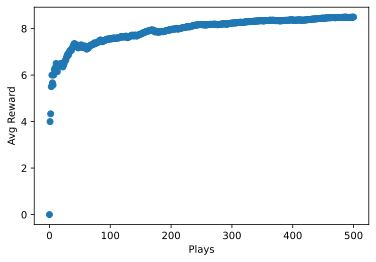

time: 251 ms (started: 2021-09-12 01:25:48 +08:00)


In [19]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel("Plays")
ax.set_ylabel("Avg Reward")
#fig.set_size_inches(9,5)

record = np.zeros((n,2)) 
probs = np.random.rand(n) 
eps = 0.2
rewards = [0]

for i in range(500):
    if random.random() > eps:
        choice = get_best_arm(record)
    else:
        choice = np.random.randint(10)
    r = get_reward(probs[choice])
    record = update_record(record,choice,r)
    mean_reward = ((i+1) * rewards[-1] + r)/(i+2)
    rewards.append(mean_reward)
ax.scatter(np.arange(len(rewards)),rewards);

正如您在图 2.3 中看到的，经过多次播放后，平均奖励确实有所提高。 我们的算法正在学习； 它正在被以前的好戏加强！ 然而这是一个如此简单的算法。

我们在这里考虑的问题是一个固定问题，因为手臂的潜在奖励概率分布不会随时间变化。 我们当然可以考虑这个问题的一个变体，如果这不是真的——一个非平稳问题。 在这种情况下，一个简单的修改是允许新的奖励观察以倾斜的方式更新存储在记录中的平均奖励值，使其成为加权平均值，向最新观察加权。 这样，如果事情随着时间发生变化，我们将能够在一定程度上跟踪它们。 我们不会在这里实现这个稍微复杂的变体，但我们会在本书后面遇到非平稳问题。

### Softmax 选择策略

想象另一种类型的强盗问题：一位新上任的医生专门治疗心脏病发作的患者。她有 10 种治疗方案，她只能选择其中一种来治疗她看到的每个患者。出于某种原因，她只知道这 10 种疗法在治疗心脏病方面具有不同的功效和风险——她还不知道哪一种是最好的。我们可以使用之前解决方案中的 n-armed bandit 算法，但我们可能想重新考虑我们的 ε-greedy 策略，即偶尔随机选择一种治疗。在这个新问题中，随机选择一种治疗方法可能会导致患者死亡，而不仅仅是损失一些钱。我们真的想确保我们不会选择最差的治疗方法，但我们仍然希望有能力探索我们的选择以找到最好的治疗方法。
 
这是 softmax 选择可能最合适的地方。 softmax 不是在探索过程中随机选择一个动作，而是为我们提供了跨选项的概率分布。例如，具有最大概率的选项将等同于先前解决方案中的最佳手臂动作，但它也会让我们了解哪些是第二和第三最佳动作。这样我们就可以随机选择探索其他选项，同时避免最糟糕的选项，因为它们将被分配很小的概率甚至 0。 这是 softmax 方程：

![](https://tva1.sinaimg.cn/large/008i3skNly1gud7cxi01kj61j80degn502.jpg)

Pr(A) 是一个函数，它接受一个动作值向量（数组）并返回动作的概率分布，这样值越高的动作具有更高的概率能力。 例如，如果您的操作值数组有四个可能的操作，并且它们当前都具有相同的值，例如 A = [10, 10, 10, 10]，则 Pr(A) = [0.25, 0.25, 0.25, 0.25] . 换句话说，所有的概率都是相同的，并且总和必须为 1。

分数的分子将动作值数组除以参数 τ 取幂，产生与输入相同大小（即长度）的向量。 分母对每个单独动作值的幂求和除以 τ，得到一个数字。

τ 是一个称为温度的参数，用于衡量动作的概率分布。 高温将导致概率非常相似，而低温将夸大动作之间概率的差异。 为这个参数选择一个值需要有根据的猜测和一些试验和错误。 数学指数 $e^x$ 是对 numpy 中 np.exp(...) 的函数调用。 它将跨输入向量逐元素地应用函数。 下面是我们在 Python 中实际编写 softmax 函数的方法。

> 清单 2.7 softmax 函数

In [20]:
def softmax(av, tau=1.12):
    softm = np.exp(av / tau) / np.sum( np.exp(av / tau) ) 
    return softm

time: 1.65 ms (started: 2021-09-12 01:32:35 +08:00)


当我们使用 softmax 实现之前的 10-armed bandit 问题时，我们不再需要 get_best_arm 函数了。 由于 softmax 在我们可能的动作中产生加权概率分布，我们可以根据动作的相对概率随机选择动作。 也就是说，我们最好的动作将被更频繁地选择，因为它具有最高的 softmax 概率，但其他动作将以较低的频率被选择。

为了实现这一点，我们需要做的就是在记录数组的第二列（列索引 1）上应用 softmax 函数，因为这是存储每个动作的当前平均奖励（动作值）的列。 它将这些动作值转换为概率。 然后我们使用 np.random.choice 函数，它接受一个任意输入数组 x 和一个参数 p，它是一个概率数组，对应于 x 中的每个元素。 由于我们的记录被初始化为全零，softmax 起初将返回所有手臂的均匀分布，但这种分布将迅速偏向与最高奖励相关的任何动作。 下面是一个使用 softmax 和随机选择函数的例子：

In [21]:
x = np.arange(10)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

time: 2.89 ms (started: 2021-09-12 01:35:51 +08:00)


In [22]:
av = np.zeros(10)
av

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

time: 5.31 ms (started: 2021-09-12 01:36:00 +08:00)


In [23]:
p = softmax(av)
p

array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

time: 4.96 ms (started: 2021-09-12 01:36:11 +08:00)


In [26]:
np.random.choice(x,p=p)

3

time: 4.03 ms (started: 2021-09-12 01:37:46 +08:00)


我们使用 numpy arange 函数创建了一个从 0 到 9 的数组，对应于每个手臂的索引，因此随机选择函数将根据提供的概率向量返回一个手臂索引。 我们可以使用与之前相同的训练循环； 我们只需要更改手臂选择部分，使其使用 softmax 而不是 get_best_arm，并且我们需要摆脱作为 epsilon-greedy 策略一部分的随机动作选择。

> 清单 2.8 用于 n 臂老虎机的 Softmax 动作选择

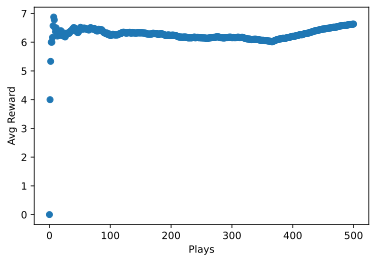

time: 570 ms (started: 2021-09-12 01:40:55 +08:00)


In [27]:
n = 10
probs = np.random.rand(n)
record = np.zeros((n,2))

fig,ax = plt.subplots(1,1)
ax.set_xlabel("Plays")
ax.set_ylabel("Avg Reward")
#fig.set_size_inches(9,5)

rewards = [0]
for i in range(500):
    p = softmax(record[:,1]) 
    choice = np.random.choice(np.arange(n),p=p) 
    r = get_reward(probs[choice])
    record = update_record(record,choice,r)
    mean_reward = ((i+1) * rewards[-1] + r)/(i+2)
    rewards.append(mean_reward)
ax.scatter(np.arange(len(rewards)),rewards)

从图 2.4 可以看出，对于这个问题，Softmax 动作选择似乎比 epsilon-greedy 方法做得更好； 看起来它更快地收敛于最优策略。 softmax 的缺点是必须手动选择 τ 参数。 这里的 Softmax 对 τ 非常敏感，需要花一些时间才能找到合适的值。 显然，对于 epsilon-greedy，我们必须设置 epsilon 参数，但选择该参数要直观得多。

## 应用bandits优化广告展示位置

老虎机的例子似乎不是一个特别现实的问题，但如果我们添加一个元素，它确实成为一个实际的商业问题，其中一个很大的例子是广告投放。 每当您访问带有广告的网站时，放置广告的公司都希望最大限度地提高您点击它们的可能性。

假设我们管理着 10 个电子商务网站，每个网站都专注于销售不同类别的零售商品，例如电脑、鞋子、珠宝等。我们希望通过将在我们的一个网站上购物的客户推荐到另一个网站来增加销售额 他们可能会感兴趣。当客户在我们网络中的某个特定站点结账时，我们将向我们的其他站点之一展示广告，希望他们去那里购买其他东西。 或者，我们可以在同一网站上放置另一个产品的广告。 我们的问题是我们不知道应该向用户推荐哪些网站。 我们可以尝试放置随机广告，但我们怀疑有可能采用更焦化的方法。

### 语境bandits

也许你可以看到这只是给我们在本章开头考虑的 n-armed ban dit 问题增加了一层新的复杂性。在每次玩游戏时（每次客户在特定网站上结账时），我们可以采取 n = 10 种可能的操作，对应于我们可以放置的 10 种不同类型的广告。不同之处在于，要放置的最佳广告可能取决于当前客户所在的网络站点。例如，在我们的珠宝网站上结账的客户可能更愿意购买一双新鞋来搭配他们的新钻石项链，而不是购买新笔记本电脑。因此，我们的问题是弄清楚特定站点如何与特定广告相关联。

这将我们引向状态空间。我们开始的 n-armed bandit 问题有一个 n 元素动作空间（所有可能动作的空间或集合），但没有状态的概念。也就是说，环境中没有信息可以帮助我们选择一个好的手臂。我们可以找出哪些臂好用的唯一方法是反复试验。在广告问题中，我们知道用户正在特定网站上购买东西，这可能会为我们提供有关该用户偏好的一些信息，并有助于指导我们决定投放哪个广告。我们将此上下文信息称为状态，并将此类新问题称为上下文bandits（见图 2.5）。

![](https://tva1.sinaimg.cn/large/008i3skNly1gue3qyg24lj61h80nsq7902.jpg)

> 定义 游戏中的状态（或者更普遍的强化学习问题）是环境中可用于做出决策的一组可用信息。

### 状态、动作、奖励
在我们继续之前，让我们合并一些我们迄今为止介绍过的术语和概念。 强化学习算法试图以计算机可以理解和计算的方式对世界进行建模。 特别是，RL 算法对世界进行建模，就好像它只涉及一组状态 S（状态空间），这是一组关于环境的特征，一组动作 A（动作空间），可以在 给定的状态，以及在特定状态下采取行动而给予的奖励 r。 当我们谈到在特定状态下采取特定动作时，我们通常称其为状态-动作对 (s, a)。

> 注意 任何 RL 算法的目标都是在整个剧集的过程中最大化奖励。

由于我们最初的 n-armed bandit 问题没有状态空间，只有动作空间，我们只需要学习动作和奖励之间的关系。 我们通过使用查找表来存储我们为特定行为获得奖励的经验来了解这种关系。 我们存储了动作-奖励对 ($a_k$, $r_k$)，其中在游戏 k 中的奖励是与采取动作$a_k$ 相关的所有过去游戏的平均值。

在我们的 n-armed bandit 问题中，我们只有 10 个动作，所以一个 10 行的查找表是非常合理的。但是当我们引入一个带有上下文禁令的状态空间时，我们开始得到可能的状态-动作-奖励元组的组合爆炸。例如，如果我们有一个包含 100 个状态的状态空间，并且每个状态与 10 个动作相关联，那么我们需要存储和重新计算 1,000 条不同的数据。在本书中我们将考虑的大多数问题中，状态空间非常大，因此简单的查找表是不可行的。

这就是深度学习的用武之地。当它们得到适当的训练时，神经网络非常擅长学习抽象，摆脱无意义的细节。他们可以学习数据中的可组合模式和规律，这样他们就可以有效地压缩大量数据，同时保留重要信息。因此，神经网络可用于学习状态-动作对和奖励之间的复杂关系，而我们不必将所有此类体验存储为原始记忆。我们经常将基于某些信息做出决策的 RL 算法部分称为agent。为了解决我们一直在讨论的上下文老虎机，我们将使用神经网络作为我们的agent。

不过，首先，我们将花点时间介绍 PyTorch，我们将在整本书中使用深度学习框架来构建神经网络。

## 使用 PyTorch 构建网络
目前有许多深度学习框架可用，其中 TensorFlow、MXNet 和 PyTorch 可能是最受欢迎的。 我们选择在本书中使用 PyTorch，因为它很简单。 它允许您编写具有原生外观的 Python 代码，并且仍然可以获得良好框架的所有优点，例如自动微分和内置优化。 我们将在此处快速介绍 PyTorch，但我们将在进行过程中进行更多解释。 如果您需要复习基本的深度学习，请参阅附录，其中我们对深度学习进行了相当详细的回顾，并对 PyTorch 进行了更全面的介绍。
 
如果您对 numpy 多维数组感到满意，那么您几乎可以用 PyTorch 替换 numpy 所做的一切。 例如，这里我们在 numpy 中实例化一个 2 × 3 矩阵：

In [30]:
import numpy

time: 2.1 ms (started: 2021-09-12 20:18:33 +08:00)


In [31]:
numpy.array([[1, 2, 3], [4, 5, 6]])

array([[1, 2, 3],
       [4, 5, 6]])

time: 4.71 ms (started: 2021-09-12 20:18:41 +08:00)


以下是使用 PyTorch 实例化相同矩阵的方法：

In [32]:
import torch
torch.Tensor([[1, 2, 3], [4, 5, 6]])

tensor([[1., 2., 3.],
        [4., 5., 6.]])

time: 822 ms (started: 2021-09-12 20:19:26 +08:00)


In [33]:
torch.tensor([[1, 2, 3], [4, 5, 6]])

tensor([[1, 2, 3],
        [4, 5, 6]])

time: 4.18 ms (started: 2021-09-12 20:19:33 +08:00)


PyTorch 代码与 numpy 版本基本相同，只是在 PyTorch 中我们称其为多维数组张量。不出所料，这也是 TensorFlow 和其他框架中使用的术语，因此习惯于看到称为张量的多维数组。我们可以并且确实参考张量阶，这基本上是张量有多少个索引维度。这有点令人困惑，因为有时我们谈到向量的维度，在这种情况下，我们指的是向量的长度。但是当我们谈到张量的阶时，我们指的是它有多少个索引。一个向量有一个索引，这意味着每个元素都可以通过一个索引值“寻址”，所以它是一个 1 阶张量或简称 1-张量。矩阵有两个索引，每个维度一个，所以它是一个 2 张量。高阶张量可以称为 k-Tensor，其中 k 是阶数，非负整数。另一方面，单个数字是 0 张量，也称为标量，因为它没有索引。

### 自动微分
我们需要而 numpy 不提供的 PyTorch 最重要的功能是自动微分和优化。 假设我们想建立一个简单的线性模型来预测一些感兴趣的数据。 我们可以使用普通的类似 numpy 的语法轻松定义模型：

In [37]:
x = torch.Tensor([2,4]) #input data
y_known = torch.Tensor([2,2])
m = torch.randn(2, requires_grad=True) #parameter 1
b = torch.randn(1, requires_grad=True) #parameter 2
y = x@m+b #linear model
loss = (torch.sum(y_known - y))**2 #loss function
loss.backward() #calculate gradients
m.grad

tensor([ 57.0674, 114.1348])

time: 5.27 ms (started: 2021-09-12 20:25:10 +08:00)


您只需将 requires_grad=True 参数提供给要计算梯度的 PyTorch 张量，然后在计算图中的最后一个节点上调用 backward() 方法，这将通过 requires_grad=True 的所有节点反向传播梯度。 然后，您可以使用自动计算的梯度进行梯度下降。

### 构建模型
对于本书的大部分内容，我们不会直接处理自动计算的梯度。 相反，我们将使用 PyTorch 的 nn 模块轻松设置前馈神经网络模型，然后使用内置优化算法自动训练神经网络，而无需手动指定反向传播和梯度下降的机制。 这是一个带有优化器设置的简单两层神经网络：

In [40]:
import torchkeras

time: 1.36 s (started: 2021-09-12 20:28:26 +08:00)


In [38]:
model = torch.nn.Sequential(
 torch.nn.Linear(10, 150),
 torch.nn.ReLU(),
 torch.nn.Linear(150, 4),
 torch.nn.ReLU(),
)
loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

time: 3.11 ms (started: 2021-09-12 20:26:43 +08:00)


In [48]:
# 网络参数
torchkeras.summary(model, input_shape=(10,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 150]           1,650
              ReLU-2                  [-1, 150]               0
            Linear-3                    [-1, 4]             604
              ReLU-4                    [-1, 4]               0
Total params: 2,254
Trainable params: 2,254
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.000038
Forward/backward pass size (MB): 0.002350
Params size (MB): 0.008598
Estimated Total Size (MB): 0.010986
----------------------------------------------------------------
time: 6.57 ms (started: 2021-09-12 20:29:50 +08:00)


我们已经建立了一个带有 ReLU（修正线性单元）激活函数的两层模型，定义了一个均方误差损失函数，并设置了一个优化器。 鉴于我们有一些标记的训练数据，我们训练这个模型所要做的就是开始一个训练循环：

In [ ]:
for step in range(100):
    y_pred = model(x)
    loss = loss_fn(y_pred, y_correct)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

x 变量是模型的输入数据。 y_correct 变量是代表标记的正确输出的张量。 我们使用模型进行预测，计算损失，然后在计算图中的最后一个节点（几乎总是损失函数）上使用 backward() 方法计算梯度。 然后我们只需在优化器上运行 step() 方法，它将运行单步梯度下降。 如果我们需要构建比序列模型更复杂的神经网络架构，我们可以编写我们自己的 Python 类，继承自 PyTorch 的模块类，并使用它：

In [50]:
from torch.nn import Module, Linear

class MyNet(Module):
    def __init__(self):
        super(MyNet, self).__init__()
        self.fc1 = Linear(784, 50)
        self.fc2 = Linear(50, 10)
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return x
model = MyNet()

time: 1.82 ms (started: 2021-09-12 20:32:05 +08:00)


这就是您现在需要了解的有关 PyTorch 的全部信息，以便提高效率。 随着本书的深入，我们将讨论其他一些花里胡哨的东西。

## 解决上下文bandits
我们为上下文强盗构建了一个模拟环境。 模拟器包括状态（从 0 到 9 的数字，代表网络中 10 个网站中的 1 个）、奖励生成（广告点击）和选择操作的方法（要投放 10 个广告中的哪个）。 下面的清单显示了上下文老虎机环境的代码，但不要花太多时间考虑它，因为我们想演示如何使用它，而不是如何编码它。

> 清单 2.9 上下文老虎机环境

In [53]:
class ContextBandit:
    def __init__(self, arms=10):
        self.arms = arms
        self.init_distribution(arms)
        self.update_state()
        
#     状态数 = 臂数，以保持简单。 每行代表一个状态，每列代表一个臂。
    def init_distribution(self, arms): 
        self.bandit_matrix = np.random.rand(arms,arms)
        
    def reward(self, prob):
        reward = 0
        for i in range(self.arms):
            if random.random() < prob:
                reward += 1
        return reward
    
    def get_state(self):
        return self.state
    
    def update_state(self):
        self.state = np.random.randint(0,self.arms)
        
    def get_reward(self,arm):
        return self.reward(self.bandit_matrix[self.get_state()][arm])
    
    def choose_arm(self, arm): 
        reward = self.get_reward(arm)
        self.update_state()
        return reward

time: 908 µs (started: 2021-09-12 20:51:31 +08:00)


以下代码片段演示了如何使用环境。 我们需要构建的唯一部分是agent，这通常是任何 RL 问题的症结所在，因为构建环境通常只涉及使用某些数据源设置输入/输出或插入现有 API。

In [54]:
env = ContextBandit(arms=10)
state = env.get_state()
reward = env.choose_arm(1)
print(state)

4
time: 1.69 ms (started: 2021-09-12 20:53:08 +08:00)


In [55]:
reward

6

time: 3.98 ms (started: 2021-09-12 20:53:14 +08:00)


模拟器包含一个名为 ContextBandit 的简单 Python 类，可以将其初始化为特定数量的武器。 为简单起见，状态数等于臂数，但通常状态空间通常远大于动作空间。 该类有两种方法：一种是 get_state()，它不带参数调用，将返回从均匀分布中随机采样的状态。 在大多数问题中，您的状态将来自更复杂的分布。 调用另一个方法，choose_arm(...)，将模拟投放广告，并返回奖励（例如，与广告点击次数成正比）。 我们需要始终按顺序调用 get_state 和choose_arm，以不断获取新数据以供学习。

与本书中的所有项目一样，我们将使用 PyTorch 来构建神经网络。 在这种情况下，我们将构建一个使用整流线性单元 (ReLU) 作为激活函数的两层前馈神经网络。 第一层接受一个包含 10 个元素的 one-hot（也称为 1-of-K，其中除一个元素之外的所有元素都是 0）编码的状态向量，最后一层返回一个包含 10 个元素的向量，表示预测的奖励 给定状态的每个动作。
 
图 2.6 显示了我们描述的算法的前向传递。 与查找表方法不同，我们的神经网络代理将学习预测每个动作在给定状态下将导致的奖励。 然后我们使用 softmax 函数给我们一个动作的概率分布，并从这个分布中采样来选择一个手臂（广告）。 选择一个手臂会给我们一个奖励，我们将用它来训练我们的神经网络。

最初我们的神经网络在状态 0 时会产生一个随机向量，例如 [1.4, 50, 4.3, 0.31, 0.43, 11, 121, 90, 8.9, 1.1]。我们将在这个向量上运行 softmax 并采样一个动作 ，最有可能是动作 6（从动作 0 到 9），因为这是示例向量中最大的数字。 选择行动 6 将产生奖励
说 8。然后我们训练我们的神经网络来产生向量 [1.4, 50, 4.3, 0.31, 0.43, 11, 8, 90, 8.9, 1.1]，因为这是我们从动作 6 中获得的真正奖励，剩下的 值不变。 下一次当神经网络看到状态 0 时，它将对接近 8 的动作 6 产生奖励预测。随着我们对许多状态和动作不断地这样做，神经网络最终将学会为每个动作预测准确的奖励 给定一个状态。 因此，我们的算法每次都能选择最佳动作，最大化我们的奖励。

以下代码导入必要的库并设置一些超参数（用于指定模型结构的参数）：

In [57]:
import numpy as np
import torch

arms = 10
N, D_in, H, D_out = 1, arms, 100, arms

time: 1.03 ms (started: 2021-09-12 22:05:14 +08:00)


在上面的代码中，N 是批量大小，D_in 是输入维度，H 是隐藏维度，D_out 是输出维度。

现在我们需要建立我们的神经网络模型。 如前所述，它是一个具有两层的简单顺序（前馈）神经网络。

In [58]:
model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out),
    torch.nn.ReLU(),
)

time: 3.6 ms (started: 2021-09-12 22:06:04 +08:00)


我们将在这里使用均方误差损失函数，但其他也可以使用。

In [59]:
loss_fn = torch.nn.MSELoss()

time: 784 µs (started: 2021-09-12 22:06:26 +08:00)


现在我们通过实例化 ContextBandit 类来设置一个新环境，向其构造函数提供臂数。 请记住，我们已经设置了环境，使得手臂的数量等于状态的数量。

In [60]:
env = ContextBandit(arms)

time: 997 µs (started: 2021-09-12 22:06:59 +08:00)


该算法的主要 for 循环将与我们最初的 n-armed bandit 算法非常相似，但我们添加了运行神经网络并使用输出选择动作的步骤。 我们将定义一个名为 train 的函数（如清单 2.10 所示），它接受我们之前创建的环境实例、我们想要训练的 epoch 数和学习率。
 
在该函数中，我们将为当前状态设置一个 PyTorch 变量，我们需要使用 one_hot(...) 编码函数对其进行单热编码：

In [61]:
def one_hot(N, pos, val=1):
    one_hot_vec = np.zeros(N)
    one_hot_vec[pos] = val
    return one_hot_vec

time: 810 µs (started: 2021-09-12 22:08:02 +08:00)


一旦我们进入主要训练 for 循环，我们将使用随机初始化的当前状态向量运行我们的神经网络模型。 它将返回一个向量，表示它对每个可能动作的值的猜测。 起初，模型会输出一堆随机值，因为它没有经过训练。

我们将对模型的输出运行 softmax 函数以生成动作的概率分布。 然后，我们将使用环境的 choose_arm(...) 函数选择一个动作，该函数将返回为执行该动作而生成的奖励； 它还将更新环境的当前状态。 我们将把奖励（它是一个非负整数）变成一个单热向量，我们可以将其用作我们的训练数据。 给定我们给模型的状态，然后我们将使用这个奖励向量运行一步反向传播。 由于我们使用神经网络模型作为我们的动作值函数，我们不再有任何类型的动作值数组来存储“记忆”； 每件事都被编码在神经网络的权重参数中。 整个 train 函数如下面的清单所示。

> 清单 2.10 主要的训练循环

In [62]:
def train(env, epochs=5000, learning_rate=1e-2):
    cur_state = torch.Tensor(one_hot(arms,env.get_state())) 
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    rewards = []
    for i in range(epochs):
        y_pred = model(cur_state) 
        av_softmax = softmax(y_pred.data.numpy(), tau=2.0) 
        av_softmax /= av_softmax.sum() 
        choice = np.random.choice(arms, p=av_softmax) 
        cur_reward = env.choose_arm(choice) 
        one_hot_reward = y_pred.data.numpy().copy() 
        one_hot_reward[choice] = cur_reward 
        reward = torch.Tensor(one_hot_reward)
        rewards.append(cur_reward)
        loss = loss_fn(y_pred, reward)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        cur_state = torch.Tensor(one_hot(arms,env.get_state())) 
    return np.array(rewards)

time: 1.96 ms (started: 2021-09-12 22:10:13 +08:00)


继续运行这个函数。 当我们训练这个网络 5,000 个 epoch 时，我们可以绘制在训练时间内获得的奖励的移动平均值（见图 2.7；我们省略了生成此类图的代码）。 我们的神经网络确实对这个上下文强盗的状态、动作和奖励之间的关系有了很好的理解。 任何游戏的最大奖励支出是 10，我们的平均值在 8.5 左右达到顶峰，这接近于这个特定强盗的数学最优值。 我们的第一个深度强化学习算法有效！ 好吧，这不是一个很深的网络，但仍然如此！

In [63]:
train(ContextBandit())

array([ 9,  1,  3, ...,  9, 10,  2])

time: 6.65 s (started: 2021-09-12 22:13:13 +08:00)


![](https://tva1.sinaimg.cn/large/008i3skNly1gue7be1oakj613a0pi40v02.jpg)

## 马尔可夫性质

在我们的上下文老虎机问题中，我们的神经网络引导我们选择给定状态的最佳动作，而无需参考任何其他先前状态。我们只是给了它当前的状态，它为每个可能的动作产生了预期的奖励。这是强化学习中的一个重要特性，称为马尔可夫特性。表现出马尔可夫特性的游戏（或任何其他控制任务）被称为马尔可夫决策过程（MDP）。使用 MDP，仅当前状态就包含足够的信息来选择最佳动作以最大化未来的奖励。将控制任务建模为 MDP 是强化学习中的一个关键概念。
 
MDP 模型极大地简化了 RL 问题，因为我们不需要考虑所有先前的状态或动作——我们不需要记忆，我们只需要分析当前情况。因此，我们总是试图将问题建模为（至少近似）马尔可夫决策过程。纸牌游戏 Blackjack（也称为 21）是一种 MDP，因为我们可以通过了解我们当前的状态（我们有什么牌，以及庄家的一张正面牌）来成功地玩游戏。

为了测试您对马尔可夫性质的理解，请考虑以下列表中的每个控制问题或决策任务，看看它是否具有马尔可夫性质：
* 开车
* 决定是否投资股票
* 为患者选择药物治疗
* 诊断病人的病情
* 预测哪支球队会在一场足球比赛中获胜
* 选择到某个目的地的最短路线（按距离计算）
* 用枪瞄准远处的目标

好的，让我们看看你是怎么做的。以下是我们的回答和简要说明：
* 驾驶汽车通常可以被认为具有马尔可夫性质，因为你不需要知道 10 分钟前发生了什么就能以最佳方式驾驶你的汽车。你只需要知道现在一切都在哪里以及你想去哪里。
* 决定是否投资一只股票不符合马尔可夫性质的标准，因为你想知道股票过去的表现以便做出决定。
* 选择医疗似乎具有马尔可夫特性，因为你不需要知道一个人的传记来选择一个好的治疗方法来治疗他们现在的病痛。
* 相比之下，诊断（而不是治疗）肯定需要对过去状态的了解。为了做出诊断，了解患者症状的历史过程通常非常重要。
* 预测哪支球队会获胜没有马尔科夫性质，因为，就像股票例子一样，你需要知道球队过去的表现才能做出好的预测。
* 选择到达目的地的最短路线具有马尔可夫性质，因为您只需要知道各种路线到目的地的距离，这与昨天发生的事情无关。
* 用枪瞄准远处的目标也具有马尔可夫特性，因为你只需要知道目标在哪里，可能还有当前的条件，比如风速和你的枪的细节。你不需要知道昨天的风速。

我们希望您能够理解，对于其中一些示例，您可以对具有马尔可夫特性的它进行论证或反对。 例如，在诊断患者时，您可能需要知道他们最近的症状病史，但如果这些记录在他们的病历中并且我们将完整的病历视为我们当前的状态，那么我们已经有效地 推导出马尔可夫性质。 记住这一点很重要：许多问题可能不自然地具有马尔可夫性质，但通常我们可以通过将更多信息干扰到状态中来诱导它。

DeepMind 的深度 Q 学习（或深度 Q 网络）算法仅从原始像素数据和当前分数就学会了玩 Atari 游戏。 Atari 游戏是否具有马尔可夫特性？ 不完全是。 在 Pacman 游戏中，如果我们的状态是来自当前帧的原始像素数据，我们不知道几格外的敌人是否正在接近我们或正在远离我们，这将强烈影响我们的行动选择 拿。 这就是为什么 DeepMind 的实现实际上是在游戏的最后四帧中输入，有效地将非 MDP 转换为 MDP。 在最后四帧中，代理可以访问所有玩家的方向和速度。

图 2.8 给出了一个使用我们迄今为止讨论过的所有概念的马尔可夫决策过程的轻松示例。 你可以看到有一个三元素状态空间 S = {哭泣的婴儿，睡觉的婴儿，微笑的婴儿}，和一个二元素的动作空间 A = {喂，不喂}。 此外，我们还注意到转移概率，它们是从动作到结果状态概率的映射（我们将在下一节中再次讨论）。 当然，在现实生活中，您作为代理不知道转换概率是多少。 如果你这样做了，你就会有一个环境模型。 稍后您将了解到，有时代理确实可以访问环境模型，有时则不能。 在代理无法访问模型的情况下，我们可能希望我们的代理学习环境模型（它可能只是近似真实的底层模型）。

![](https://tva1.sinaimg.cn/large/008i3skNly1gue7l0159ej61g80nwdjc02.jpg)

## 预测未来回报：价值和政策函数
信不信由你，我们实际上在前面的部分中走私了很多知识。 我们为 n-armed bandit 和 contextual bandit 设置解决方案的方式是标准的强化学习方法，因此，我们所做的背后有一大堆既定的术语和数学。 我们已经介绍了一些术语，例如状态和动作空间，但我们大多只是用自然语言描述事物。 为了让您了解最新的 RL 研究论文并让我们使以后的章节不那么冗长，熟悉行话和数学很重要。

让我们回顾和形式化你到目前为止学到的东西（总结在图 2.9 中）。 强化学习算法本质上构建了一个代理，该代理在某些环境中起作用。 环境通常是一个游戏，但更一般地说，是产生状态、动作和奖励的任何过程。 代理可以访问环境的当前状态，即在特定时间点 $s_t$ ∈ S 的有关环境的所有数据。 使用此状态信息，代理在 ∈ A 处采取行动，这可能是确定性的或概率性的 将环境更改为新状态，$s_{t +1}$。

通过采取行动将状态映射到新状态的概率称为转移概率。 代理收到奖励 rt，因为它在状态 st 处采取了导致新状态$s_{t +1}$ 的动作。 我们知道代理（我们的强化学习算法）的最终目标是最大化其奖励。 真正产生奖励的是状态转换 $s_t$ → $s_{t+1}$，而不是动作本身，因为动作可能会导致不良状态。 如果你在一部动作片中（没有双关语）并且你从一个屋顶跳到另一个屋顶上，你可能会优雅地降落在另一个屋顶上，或者完全错过并摔倒——你的危险才是最重要的（这两种可能导致 状态），而不是你跳跃的事实（动作）。

![](https://tva1.sinaimg.cn/large/008i3skNly1gue7otkh19j61ay0syadf02.jpg)

### 策略函数
我们究竟如何使用我们当前的状态信息来决定采取什么行动？ 这就是价值函数和策略函数的关键概念发挥作用的地方，我们已经有了一些经验。 先说策略。

换句话说，策略 π 是代理在某种环境中的策略。 例如，二十一点庄家的策略是一直打到牌值达到 17 或更大。 这是一个简单的固定策略。 在我们的 n-armed 强盗问题中，我们的策略是一个 epsilon-greedy 策略。 一般而言，策略是一个函数，它将状态映射到该状态下可能的操作集上的概率分布。

![](https://tva1.sinaimg.cn/large/008i3skNly1gue7q8ywpyj61fc0aqt9y02.jpg)

在数学符号中，s 是一个状态，而 Pr(A | s) 是给定状态 s 的一组动作 A 上的概率分布。 分布中每个动作的概率是该动作产生最大奖励的概率。

### 最优策略
策略是我们强化学习算法的一部分，它根据当前状态选择动作。 然后我们可以制定最优策略——这是最大化奖励的策略。

![](https://tva1.sinaimg.cn/large/008i3skNly1gue7txu1ltj61f00c040202.jpg)

请记住，特定策略是映射或函数，因此我们有一些可能的策略集； 最优策略只是这组可能策略上的 argmax（选择最大值）作为其预期回报的函数。
 
同样，强化学习算法（我们的代理）的整个目标是选择导致最大预期回报的动作。 但是有两种方法可以训练我们的代理来做到这一点：
* 直接——我们可以教智能体学习什么动作是最好的，给定它处于什么状态。
* 间接——我们可以教智能体了解哪些状态最有价值，然后采取行动来获得最有价值的状态。

这种间接方法使我们想到了值函数的概念。

### 值函数
价值函数是将状态或状态-动作对映射到处于某种状态或在某种状态下采取某种行动的预期值（预期回报）的函数。 您可能会从统计数据中回忆起，预期奖励只是处于某种状态或采取某些行动后获得的长期平均奖励。 当我们谈到价值函数时，我们通常指的是状态-价值函数。

![](https://tva1.sinaimg.cn/large/008i3skNly1gue7w24ushj61f60ac75m02.jpg)

这是一个函数，它接受一个状态 s，并返回从该状态开始并根据我们的策略 π 采取行动的预期回报。价值函数依赖于策略的原因可能不是很明显。考虑到在我们的上下文老虎机问题中，如果我们的策略是选择完全随机的动作（即来自均匀分布的样本动作），状态的价值（预期奖励）可能会非常低，因为我们绝对不会选择最好的行动。相反，我们想要使用的策略不是对动作的均匀分布，而是在采样时会产生最大奖励的概率分布。也就是说，策略决定了观察到的奖励，价值函数是观察到的奖励的反映。
 
在我们的第一个 n-armed bandit 问题中，您被介绍了状态-动作-值函数。这些函数通常被称为 Q 函数或 Q 值，这就是深度 Q 学习的来源，因为正如您将在下一章中看到的那样，深度学习算法可以用作 Q 函数。

![](https://tva1.sinaimg.cn/large/008i3skNly1gue7z4oj35j31fu0d4gne.jpg)

事实上，我们实现了一个深度 Q 网络来解决我们的上下文老虎机问题（尽管它是一个非常浅的神经网络），因为它本质上是一个 Q 函数。 我们训练它以准确估计在给定状态下采取行动的预期回报。 我们的策略函数是神经网络输出上的 softmax 函数。
 
我们仅通过使用 n-armed 和 contextual bandits 作为示例，就涵盖了强化学习中的许多基本概念。 在本章中，我们还深入了解了深度强化学习。 在下一章中，我们将实现一个完整的深度 Q 网络，类似于 DeepMind 用来在超人级别玩 Atari 游戏的算法。 这将是我们在此介绍的内容的自然延伸。

**概括**
* 状态空间是系统可以处于的所有可能状态的集合。在国际象棋中，这将是所有有效棋盘配置的集合。动作是将状态 s 映射到新状态 s' 的函数。一个动作可能是随机的，因此它可以将一个状态 s 概率性地映射到一个新状态 s'。在从中选择一个的一组可能的新状态上可能存在某种概率分布。动作空间是特定状态的所有可能动作的集合。
* 环境是状态、动作和奖励的来源。如果我们正在构建一个 RL 算法来玩游戏，那么游戏就是环境。环境模型是状态空间、动作空间和转移概率的近似。
* 奖励是环境产生的信号，表明在给定状态下采取行动的相对成功。预期奖励是一个统计概念，非正式地指的是某个随机变量 X（在我们的例子中，奖励）的长期平均值，表示为 E[X]。例如，在 n-armed bandit 情况下，E[R⏐a]（给定动作 a 的预期奖励）是采取每个 n 动作的长期平均奖励。如果我们知道概率分布
在动作 a 上，我们可以计算 N 次游戏的预期奖励的精确值，如 E[R⏐ai] = ΣNi =1aipi ⋅ r，其中 N 是游戏的游戏次数，pi 指指动作 ai 的概率，r 指最大可能的奖励。
* 代理是一种学习在给定环境中表现最佳的强化学习算法。代理通常被实现为深度神经网络。代理的目标是最大化预期奖励，或者等效地导航到最高价值状态。
* 策略是一种特定的策略。形式上，它是一个函数，它要么接受一个状态并产生一个要采取的动作，要么在给定状态的情况下在动作空间上产生一个概率分布。一个常见的策略是 epsilon-greedy 策略，其中我们以概率 ε 在动作空间中采取随机动作，并且以概率 ε - 1 我们选择目前已知的最佳动作。
* 一般来说，价值函数是在给定一些相关数据的情况下返回预期回报的任何函数。如果没有额外的上下文，它通常指的是状态值函数，它是一个接受状态并返回从该状态开始并根据某些策略行事的预期奖励的函数。 Q 值是给定状态-动作对的预期奖励，Q 函数是在给定状态-动作对时产生 Q 值的函数。
* 马尔可夫决策过程是一种决策过程，通过它可以在不参考先前状态的历史的情况下做出最佳决策。